In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import csv
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data_district = pd.read_csv("/content/drive/MyDrive/telangana/dim_districts.csv")
data_pass = pd.read_csv("/content/drive/MyDrive/telangana/fact_TS_iPASS.csv")

In [4]:
data_district

,dist_code,district
0,19_1,Adilabad
1,22_2,Bhadradri Kothagudem
2,21_1,Hanumakonda
3,16_1,Hyderabad
4,20_2,Jagtial
5,21_3,Jangoan
6,21_7,Jayashankar Bhupalpally
7,14_2,Jogulamba Gadwal
8,18_2,Kamareddy
9,20_1,Karimnagar


In [5]:
data_pass

,dist_code,month,sector,investment in cr,number_of_employees
0,14_1,01-04-2019,Engineering,2.3200,15
1,19_1,01-04-2019,Engineering,0.6250,13
2,20_3,01-04-2019,Wood and Leather,0.2000,8
3,20_3,01-04-2019,Textiles,0.2675,27
4,21_5,01-04-2019,Electrical and Electronic Products,0.1200,5
...,...,...,...,...,...
5748,20_4,01-03-2023,Engineering,0.1200,3
5749,20_4,01-03-2023,Food Processing,0.7509,9
5750,20_4,01-03-2023,Others,7.7500,10
5751,21_1,01-03-2023,Food Processing,0.3200,9


In [6]:
data_pass['district'] = data_pass['dist_code'].map(data_district.set_index('dist_code')['district'])

In [7]:
data_pass

,dist_code,month,sector,investment in cr,number_of_employees,district
0,14_1,01-04-2019,Engineering,2.3200,15,Mahabubnagar
1,19_1,01-04-2019,Engineering,0.6250,13,Adilabad
2,20_3,01-04-2019,Wood and Leather,0.2000,8,Rajanna Sircilla
3,20_3,01-04-2019,Textiles,0.2675,27,Rajanna Sircilla
4,21_5,01-04-2019,Electrical and Electronic Products,0.1200,5,Mahabubabad
...,...,...,...,...,...,...
5748,20_4,01-03-2023,Engineering,0.1200,3,Peddapalli
5749,20_4,01-03-2023,Food Processing,0.7509,9,Peddapalli
5750,20_4,01-03-2023,Others,7.7500,10,Peddapalli
5751,21_1,01-03-2023,Food Processing,0.3200,9,Hanumakonda


In [8]:
column_to_move = 'district'
new_order = [column_to_move] + [col for col in data_pass.columns if col != column_to_move]
data_pass = data_pass[new_order]
data_pass

,district,dist_code,month,sector,investment in cr,number_of_employees
0,Mahabubnagar,14_1,01-04-2019,Engineering,2.3200,15
1,Adilabad,19_1,01-04-2019,Engineering,0.6250,13
2,Rajanna Sircilla,20_3,01-04-2019,Wood and Leather,0.2000,8
3,Rajanna Sircilla,20_3,01-04-2019,Textiles,0.2675,27
4,Mahabubabad,21_5,01-04-2019,Electrical and Electronic Products,0.1200,5
...,...,...,...,...,...,...
5748,Peddapalli,20_4,01-03-2023,Engineering,0.1200,3
5749,Peddapalli,20_4,01-03-2023,Food Processing,0.7509,9
5750,Peddapalli,20_4,01-03-2023,Others,7.7500,10
5751,Hanumakonda,21_1,01-03-2023,Food Processing,0.3200,9


In [9]:
del data_pass['dist_code']

In [10]:
data_pass

,district,month,sector,investment in cr,number_of_employees
0,Mahabubnagar,01-04-2019,Engineering,2.3200,15
1,Adilabad,01-04-2019,Engineering,0.6250,13
2,Rajanna Sircilla,01-04-2019,Wood and Leather,0.2000,8
3,Rajanna Sircilla,01-04-2019,Textiles,0.2675,27
4,Mahabubabad,01-04-2019,Electrical and Electronic Products,0.1200,5
...,...,...,...,...,...
5748,Peddapalli,01-03-2023,Engineering,0.1200,3
5749,Peddapalli,01-03-2023,Food Processing,0.7509,9
5750,Peddapalli,01-03-2023,Others,7.7500,10
5751,Hanumakonda,01-03-2023,Food Processing,0.3200,9


In [11]:
data_pass_2 = data_pass.copy(deep=True)

In [12]:
data_pass_2

,district,month,sector,investment in cr,number_of_employees
0,Mahabubnagar,01-04-2019,Engineering,2.3200,15
1,Adilabad,01-04-2019,Engineering,0.6250,13
2,Rajanna Sircilla,01-04-2019,Wood and Leather,0.2000,8
3,Rajanna Sircilla,01-04-2019,Textiles,0.2675,27
4,Mahabubabad,01-04-2019,Electrical and Electronic Products,0.1200,5
...,...,...,...,...,...
5748,Peddapalli,01-03-2023,Engineering,0.1200,3
5749,Peddapalli,01-03-2023,Food Processing,0.7509,9
5750,Peddapalli,01-03-2023,Others,7.7500,10
5751,Hanumakonda,01-03-2023,Food Processing,0.3200,9


In [13]:
data_pass_2['month'] = pd.to_datetime(data_pass_2['month'], format='%d-%m-%Y')

In [14]:
data_pass_2

,district,month,sector,investment in cr,number_of_employees
0,Mahabubnagar,2019-04-01,Engineering,2.3200,15
1,Adilabad,2019-04-01,Engineering,0.6250,13
2,Rajanna Sircilla,2019-04-01,Wood and Leather,0.2000,8
3,Rajanna Sircilla,2019-04-01,Textiles,0.2675,27
4,Mahabubabad,2019-04-01,Electrical and Electronic Products,0.1200,5
...,...,...,...,...,...
5748,Peddapalli,2023-03-01,Engineering,0.1200,3
5749,Peddapalli,2023-03-01,Food Processing,0.7509,9
5750,Peddapalli,2023-03-01,Others,7.7500,10
5751,Hanumakonda,2023-03-01,Food Processing,0.3200,9


In [15]:
# Filter data for the two financial years
fy_2021 = data_pass_2[(data_pass_2['month'] >= '2021-04-01') & (data_pass_2['month'] <= '2022-03-31')]
fy_2022 = data_pass_2[(data_pass_2['month'] >= '2022-04-01') & (data_pass_2['month'] <= '2023-03-31')]

In [16]:
fy_2022

,district,month,sector,investment in cr,number_of_employees
4320,Rangareddy,2022-04-01,Engineering,38.2726,171
4321,Rangareddy,2022-04-01,Agro based incl Cold Storages,0.2400,7
4322,Khammam,2022-04-01,Beverages,0.0750,2
4323,Khammam,2022-04-01,Agro based incl Cold Storages,0.0800,4
4324,Narayanpet,2022-04-01,Food Processing,1.5573,25
...,...,...,...,...,...
5748,Peddapalli,2023-03-01,Engineering,0.1200,3
5749,Peddapalli,2023-03-01,Food Processing,0.7509,9
5750,Peddapalli,2023-03-01,Others,7.7500,10
5751,Hanumakonda,2023-03-01,Food Processing,0.3200,9


In [17]:
sector_2022 = fy_2022.groupby('sector').agg({
    'investment in cr': 'sum'
}).reset_index()

In [18]:
sector_2022

,sector,investment in cr
0,Agro based incl Cold Storages,1263.5502
1,Automobile,1567.4271
2,Beverages,476.7425
3,"Cement, Cement & Concrete Products, Fly Ash Br...",1142.7468
4,Electrical and Electronic Products,484.4655
5,Engineering,1877.4533
6,"Fertlizers Organic and Inorganic,Pesticides,In...",34.2244
7,Food Processing,1455.9435
8,Granite and Stone Crushing,946.7192
9,Industrial Parks and IT Buildings,280.4090


In [19]:
district_all = data_pass_2.groupby('district').agg({
    'investment in cr': 'sum'
}).reset_index()

In [20]:
district_all

,district,investment in cr
0,Adilabad,40.0947
1,Bhadradri Kothagudem,2028.5045
2,Hanumakonda,196.6659
3,Hyderabad,55.7956
4,Jagtial,169.4510
5,Jangoan,158.4115
6,Jayashankar Bhupalpally,35.9193
7,Jogulamba Gadwal,138.0338
8,Kamareddy,1937.0637
9,Karimnagar,425.0853


In [21]:
q8 = sector_2022.sort_values(by='investment in cr', ascending=False).reset_index(drop=True)
q8 = q8.head(5)
q8

,sector,investment in cr
0,Plastic and Rubber,5855.6095
1,Pharmaceuticals and Chemicals,2181.6342
2,"Real Estate,Industrial Parks and IT Buildings",2127.2963
3,Solar and Other Renewable Energy,2052.9850
4,Engineering,1877.4533


In [22]:
sector_2022

,sector,investment in cr
0,Agro based incl Cold Storages,1263.5502
1,Automobile,1567.4271
2,Beverages,476.7425
3,"Cement, Cement & Concrete Products, Fly Ash Br...",1142.7468
4,Electrical and Electronic Products,484.4655
5,Engineering,1877.4533
6,"Fertlizers Organic and Inorganic,Pesticides,In...",34.2244
7,Food Processing,1455.9435
8,Granite and Stone Crushing,946.7192
9,Industrial Parks and IT Buildings,280.4090


In [23]:
q9 = district_all.sort_values(by='investment in cr', ascending=False).reset_index(drop=True)
q9 = q9.head(3)
q9

,district,investment in cr
0,Rangareddy,42706.3320
1,Sangareddy,12366.7556
2,Medchal_Malkajgiri,10394.5610


In [24]:
q11a = fy_2021.groupby(['district','sector']).agg({
    'investment in cr': 'sum'
}).reset_index()
q11b = fy_2022.groupby(['district','sector']).agg({
    'investment in cr': 'sum'
}).reset_index()


In [25]:
q11b

,district,sector,investment in cr
0,Adilabad,Agro based incl Cold Storages,1.9500
1,Adilabad,Beverages,0.1250
2,Adilabad,"Cement, Cement & Concrete Products, Fly Ash Br...",0.2100
3,Adilabad,Engineering,0.3250
4,Adilabad,Food Processing,0.9450
...,...,...,...
315,Yadadri Bhuvanagiri,R&D,37.0731
316,Yadadri Bhuvanagiri,"Real Estate,Industrial Parks and IT Buildings",10.0000
317,Yadadri Bhuvanagiri,Solar and Other Renewable Energy,1.7052
318,Yadadri Bhuvanagiri,Textiles,3.4492


In [26]:
pivot_table = q11a.pivot_table(index='district', columns='sector', values='investment in cr', aggfunc='sum', fill_value=0)

In [27]:
pivot_table

sector,Agro based incl Cold Storages,Automobile,Beverages,"Cement, Cement & Concrete Products, Fly Ash Bricks",Electrical and Electronic Products,Engineering,"Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related",Food Processing,Granite and Stone Crushing,Others,Paper and Printing,Pharmaceuticals and Chemicals,Plastic and Rubber,R&D,"Real Estate,Industrial Parks and IT Buildings",Solar and Other Renewable Energy,Textiles,Wood and Leather
district,,,,,,,,,,,,,,,,,,
Adilabad,0.0900,0.00,0.2080,1.2359,0.0000,0.0000,0.0000,0.8507,2.8574,0.1550,0.1500,0.2000,0.1400,0.0000,0.0000,0.0000,0.0000,0.1300
Bhadradri Kothagudem,2.3080,0.00,0.1650,10.6900,0.0000,0.8900,0.0000,3.6600,0.0000,0.6075,21.8885,0.0000,1.3106,0.0000,0.0000,0.0000,0.0000,0.8050
Hanumakonda,0.6700,0.00,0.0500,1.8510,1.7242,1.7627,0.0000,5.5612,3.5960,10.8620,0.0000,2.7000,2.8200,0.0000,0.0000,0.0000,0.0000,0.0000
Hyderabad,0.0000,0.00,0.0000,0.0000,0.0000,1.3600,0.0000,10.9000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Jagtial,15.8154,0.00,1.5970,2.1300,0.0000,3.1580,0.0000,21.6060,2.5500,0.0000,0.4900,0.1000,0.1010,0.0000,0.0000,0.0000,0.4268,0.5020
Jangoan,6.6893,0.00,0.2560,0.3400,1.2100,0.2200,0.0000,22.4480,2.9100,7.0200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0800,0.2200
Jayashankar Bhupalpally,0.0900,0.00,0.0000,0.7446,0.0000,0.2726,0.0000,5.5850,0.3510,0.0000,0.0000,0.0000,0.1690,0.0000,0.0000,0.0000,0.0000,0.0000
Jogulamba Gadwal,0.0000,0.00,0.0000,0.0000,0.0000,4.3417,0.0000,6.4820,0.0000,0.0000,0.0000,0.0000,1.0771,0.0000,0.0000,0.0000,7.1765,0.0000
Kamareddy,11.4098,0.00,0.0000,0.8000,0.0000,1.3525,0.0000,134.0019,0.0000,0.1100,0.2510,242.1596,0.0000,0.0000,0.0000,0.0000,0.0000,0.3900


In [28]:
pivot_table = pivot_table.reset_index()
pivot_table

sector,district,Agro based incl Cold Storages,Automobile,Beverages,"Cement, Cement & Concrete Products, Fly Ash Bricks",Electrical and Electronic Products,Engineering,"Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related",Food Processing,Granite and Stone Crushing,Others,Paper and Printing,Pharmaceuticals and Chemicals,Plastic and Rubber,R&D,"Real Estate,Industrial Parks and IT Buildings",Solar and Other Renewable Energy,Textiles,Wood and Leather
0,Adilabad,0.0900,0.00,0.2080,1.2359,0.0000,0.0000,0.0000,0.8507,2.8574,0.1550,0.1500,0.2000,0.1400,0.0000,0.0000,0.0000,0.0000,0.1300
1,Bhadradri Kothagudem,2.3080,0.00,0.1650,10.6900,0.0000,0.8900,0.0000,3.6600,0.0000,0.6075,21.8885,0.0000,1.3106,0.0000,0.0000,0.0000,0.0000,0.8050
2,Hanumakonda,0.6700,0.00,0.0500,1.8510,1.7242,1.7627,0.0000,5.5612,3.5960,10.8620,0.0000,2.7000,2.8200,0.0000,0.0000,0.0000,0.0000,0.0000
3,Hyderabad,0.0000,0.00,0.0000,0.0000,0.0000,1.3600,0.0000,10.9000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,Jagtial,15.8154,0.00,1.5970,2.1300,0.0000,3.1580,0.0000,21.6060,2.5500,0.0000,0.4900,0.1000,0.1010,0.0000,0.0000,0.0000,0.4268,0.5020
5,Jangoan,6.6893,0.00,0.2560,0.3400,1.2100,0.2200,0.0000,22.4480,2.9100,7.0200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0800,0.2200
6,Jayashankar Bhupalpally,0.0900,0.00,0.0000,0.7446,0.0000,0.2726,0.0000,5.5850,0.3510,0.0000,0.0000,0.0000,0.1690,0.0000,0.0000,0.0000,0.0000,0.0000
7,Jogulamba Gadwal,0.0000,0.00,0.0000,0.0000,0.0000,4.3417,0.0000,6.4820,0.0000,0.0000,0.0000,0.0000,1.0771,0.0000,0.0000,0.0000,7.1765,0.0000
8,Kamareddy,11.4098,0.00,0.0000,0.8000,0.0000,1.3525,0.0000,134.0019,0.0000,0.1100,0.2510,242.1596,0.0000,0.0000,0.0000,0.0000,0.0000,0.3900
9,Karimnagar,5.2200,0.00,0.3050,4.9440,0.0000,4.9440,0.0000,13.1491,63.4898,11.4127,0.0000,0.2300,0.4500,0.0000,0.2259,0.0000,0.2050,0.9991


In [29]:
pivot_table = pivot_table.rename_axis(None, axis=1)

In [30]:
columns_except_district = [col for col in pivot_table.columns if col != 'district']
columns_except_district

['Agro based incl Cold Storages',
 'Automobile',
 'Beverages',
 'Cement, Cement & Concrete Products, Fly Ash Bricks',
 'Electrical and Electronic Products',
 'Engineering',
 'Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related',
 'Food Processing',
 'Granite and Stone Crushing',
 'Others',
 'Paper and Printing',
 'Pharmaceuticals and Chemicals',
 'Plastic and Rubber',
 'R&D',
 'Real Estate,Industrial Parks and IT Buildings',
 'Solar and Other Renewable Energy',
 'Textiles',
 'Wood and Leather']

In [31]:
# Extract the first column
first_column = pivot_table.iloc[:, 0]

# Normalize the rest of the columns to percentages
df_percentage = pivot_table.iloc[:, 1:].div(pivot_table.iloc[:, 1:].sum(), axis=1) * 100

# Concatenate the first column and the normalized DataFrame
normalized_df = pd.concat([first_column, df_percentage], axis=1)
normalized_df

,district,Agro based incl Cold Storages,Automobile,Beverages,"Cement, Cement & Concrete Products, Fly Ash Bricks",Electrical and Electronic Products,Engineering,"Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related",Food Processing,Granite and Stone Crushing,Others,Paper and Printing,Pharmaceuticals and Chemicals,Plastic and Rubber,R&D,"Real Estate,Industrial Parks and IT Buildings",Solar and Other Renewable Energy,Textiles,Wood and Leather
0,Adilabad,0.027673,0.0,0.011282,1.022244,0.000000,0.000000,0.000000,0.085124,0.713013,0.023934,0.072849,0.002915,0.006797,0.000000,0.000000,0.000000,0.000000,0.381993
1,Bhadradri Kothagudem,0.709654,0.0,0.008949,8.841967,0.000000,0.091988,0.000000,0.366234,0.000000,0.093804,10.630439,0.000000,0.063633,0.000000,0.000000,0.000000,0.000000,2.365421
2,Hanumakonda,0.206009,0.0,0.002712,1.531009,0.977109,0.182188,0.000000,0.556475,0.897318,1.677202,0.000000,0.039353,0.136918,0.000000,0.000000,0.000000,0.000000,0.000000
3,Hyderabad,0.000000,0.0,0.000000,0.000000,0.000000,0.140566,0.000000,1.090696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Jagtial,4.862849,0.0,0.086620,1.761776,0.000000,0.326402,0.000000,2.161979,0.636307,0.000000,0.237975,0.001458,0.004904,0.000000,0.000000,0.000000,0.262853,1.475082
5,Jangoan,2.056796,0.0,0.013885,0.281223,0.685710,0.022739,0.000000,2.246233,0.726139,1.083959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049270,0.646450
6,Jayashankar Bhupalpally,0.027673,0.0,0.000000,0.615877,0.000000,0.028175,0.000000,0.558856,0.087586,0.000000,0.000000,0.000000,0.008205,0.000000,0.000000,0.000000,0.000000,0.000000
7,Jogulamba Gadwal,0.000000,0.0,0.000000,0.000000,0.000000,0.448747,0.000000,0.648614,0.000000,0.000000,0.000000,0.000000,0.052296,0.000000,0.000000,0.000000,4.419789,0.000000
8,Kamareddy,3.508235,0.0,0.000000,0.661700,0.000000,0.139791,0.000000,13.408743,0.000000,0.016985,0.121901,3.529544,0.000000,0.000000,0.000000,0.000000,0.000000,1.145980
9,Karimnagar,1.605022,0.0,0.016543,4.089306,0.000000,0.510999,0.000000,1.315749,15.842753,1.762236,0.000000,0.003352,0.021849,0.000000,0.011209,0.000000,0.126253,2.935766


In [32]:
normalized_df.set_index('district', inplace=True)

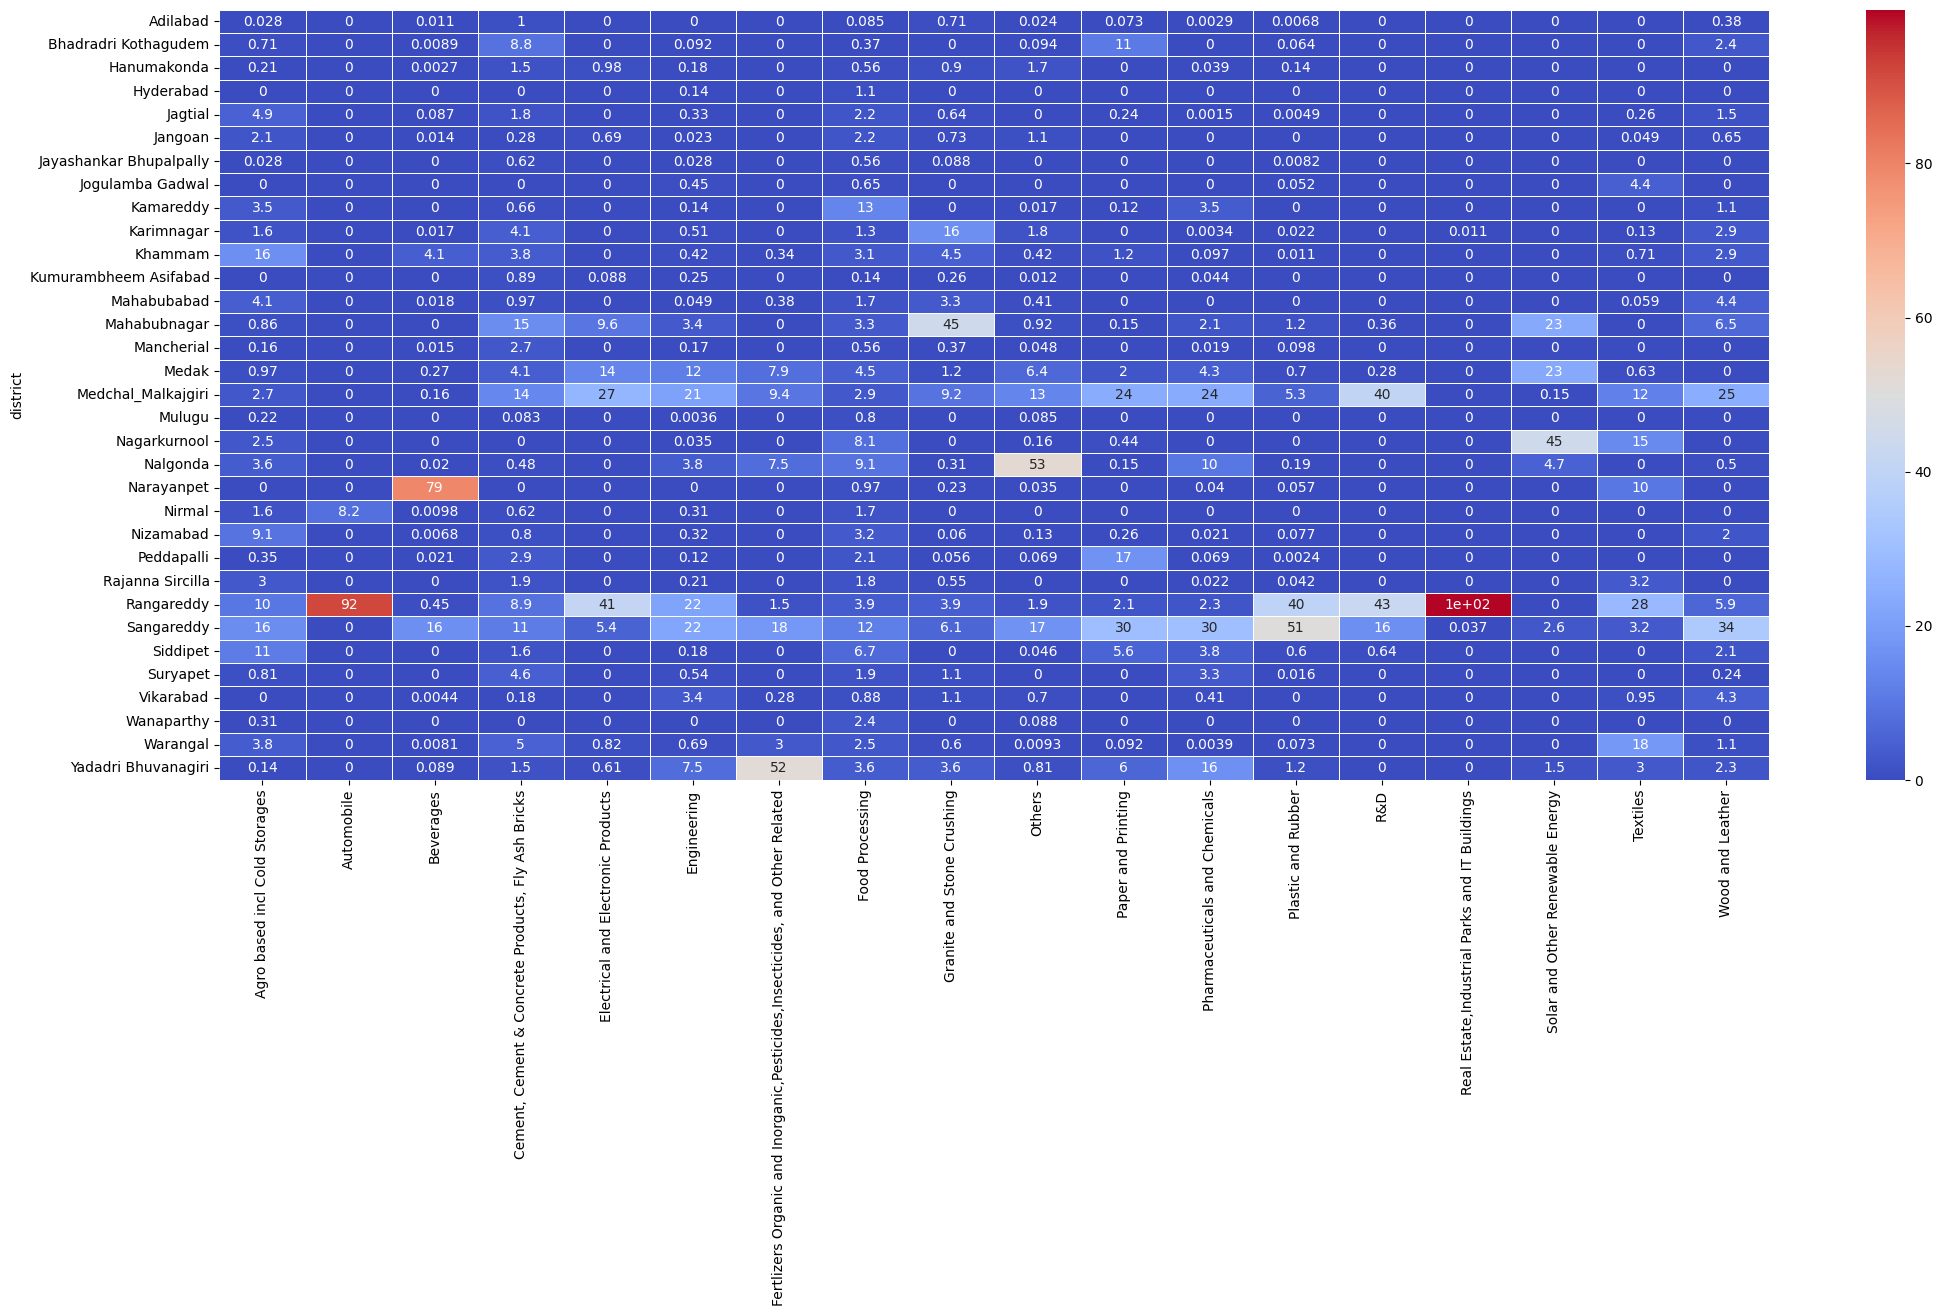

In [33]:
plt.figure(figsize=(25,10))
sns.heatmap(normalized_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [34]:
fy_2019 = data_pass_2[(data_pass_2['month'] >= '2019-04-01') & (data_pass_2['month'] <= '2020-03-31')]

In [35]:
q12a = fy_2019.groupby(['month','sector']).agg({
    'investment in cr': 'sum'
}).reset_index()

q12b = fy_2022.groupby(['month','sector']).agg({
    'investment in cr': 'sum'
}).reset_index()

In [36]:
q12b

,month,sector,investment in cr
0,2022-04-01,Agro based incl Cold Storages,31.0503
1,2022-04-01,Automobile,2.0000
2,2022-04-01,Beverages,7.1350
3,2022-04-01,"Cement, Cement & Concrete Products, Fly Ash Br...",5.2127
4,2022-04-01,Electrical and Electronic Products,9.9159
...,...,...,...
191,2023-03-01,Pharmaceuticals and Chemicals,142.0301
192,2023-03-01,Plastic and Rubber,479.8881
193,2023-03-01,R&D,9.3208
194,2023-03-01,Textiles,23.9759


In [37]:
q12a.to_csv('/content/drive/MyDrive/q12a.csv',index=False)
q12b.to_csv('/content/drive/MyDrive/q12b.csv',index=False)

In [38]:
q8.to_csv('/content/drive/MyDrive/q8.csv',index=False)
q9.to_csv('/content/drive/MyDrive/q9.csv',index=False)

In [39]:
q12a

,month,sector,investment in cr
0,2019-04-01,Agro based incl Cold Storages,66.4474
1,2019-04-01,Beverages,0.3410
2,2019-04-01,"Cement, Cement & Concrete Products, Fly Ash Br...",40.8027
3,2019-04-01,Electrical and Electronic Products,15.0700
4,2019-04-01,Engineering,61.4222
...,...,...,...
193,2020-03-01,R&D,3.5000
194,2020-03-01,"Real Estate,Industrial Parks and IT Buildings",1536.0400
195,2020-03-01,Solar and Other Renewable Energy,0.9500
196,2020-03-01,Textiles,8.6470


In [40]:
pivot_q12a = q12a.pivot_table(index='sector', columns='month', values='investment in cr', aggfunc='sum')

In [41]:
pivot_q12a = pivot_q12a.reset_index()
pivot_q12a = pivot_q12a.rename_axis(None, axis=1)
pivot_q12a

,sector,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
0,Agro based incl Cold Storages,66.4474,7.4647,14.2219,14.1849,34.1659,6.1280,30.2558,14.2025,8.8229,21.7675,16.4105,12.3923
1,Automobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0100
2,Beverages,0.3410,2.4787,9.5599,8.7788,0.3000,3.9596,88.5434,0.9900,3.0025,1.2041,0.2300,0.8725
3,"Cement, Cement & Concrete Products, Fly Ash Br...",40.8027,9.6945,408.7735,230.4305,4.7070,11.2710,10.8970,7.8416,7.4137,13.0032,73.0536,8.4541
4,Electrical and Electronic Products,15.0700,17.2259,20.1744,8.5768,5.3462,4.6000,15.9405,9.6329,8.3000,19.4313,2.8991,8.6099
5,Engineering,61.4222,131.0673,22.4360,36.0161,27.6688,49.0736,295.7089,36.2939,62.7134,52.4474,39.4521,64.9891
6,"Fertlizers Organic and Inorganic,Pesticides,In...",0.0500,1.1100,1.7500,4.5000,0.2500,2.0000,3.6317,0.1200,5255.4800,4.8500,3.7100,10.8782
7,Food Processing,46.0915,98.1769,14.7063,130.9247,24.4262,89.8282,143.5473,86.6436,36.5237,15.2206,44.8609,31.2137
8,Granite and Stone Crushing,25.0458,17.0717,9.3858,26.0027,26.1557,26.3179,23.5751,13.1925,19.0750,16.4955,24.7698,40.6462
9,Others,NaN,61.3896,320.1763,266.9600,119.5110,2.3275,0.8704,38.2741,201.2350,4.0825,12.8730,77.9127


In [42]:
pivot_q12a.columns = [pivot_q12a.columns[0]] + pd.to_datetime(pivot_q12a.columns[1:]).strftime('%B %Y').tolist()
pivot_q12a

,sector,April 2019,May 2019,June 2019,July 2019,August 2019,September 2019,October 2019,November 2019,December 2019,January 2020,February 2020,March 2020
0,Agro based incl Cold Storages,66.4474,7.4647,14.2219,14.1849,34.1659,6.1280,30.2558,14.2025,8.8229,21.7675,16.4105,12.3923
1,Automobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0100
2,Beverages,0.3410,2.4787,9.5599,8.7788,0.3000,3.9596,88.5434,0.9900,3.0025,1.2041,0.2300,0.8725
3,"Cement, Cement & Concrete Products, Fly Ash Br...",40.8027,9.6945,408.7735,230.4305,4.7070,11.2710,10.8970,7.8416,7.4137,13.0032,73.0536,8.4541
4,Electrical and Electronic Products,15.0700,17.2259,20.1744,8.5768,5.3462,4.6000,15.9405,9.6329,8.3000,19.4313,2.8991,8.6099
5,Engineering,61.4222,131.0673,22.4360,36.0161,27.6688,49.0736,295.7089,36.2939,62.7134,52.4474,39.4521,64.9891
6,"Fertlizers Organic and Inorganic,Pesticides,In...",0.0500,1.1100,1.7500,4.5000,0.2500,2.0000,3.6317,0.1200,5255.4800,4.8500,3.7100,10.8782
7,Food Processing,46.0915,98.1769,14.7063,130.9247,24.4262,89.8282,143.5473,86.6436,36.5237,15.2206,44.8609,31.2137
8,Granite and Stone Crushing,25.0458,17.0717,9.3858,26.0027,26.1557,26.3179,23.5751,13.1925,19.0750,16.4955,24.7698,40.6462
9,Others,NaN,61.3896,320.1763,266.9600,119.5110,2.3275,0.8704,38.2741,201.2350,4.0825,12.8730,77.9127


In [43]:
# Add the list of column names as a new column to the DataFrame
maxy = pivot_q12a.filter(like='20').apply(lambda x: ', '.join(x[x.eq(x.max())].index), axis=1)
miny = pivot_q12a.filter(like='20').apply(lambda x: ', '.join(x[x.eq(x.min())].index), axis=1)
pivot_q12a['Max_Investment_Month_FY2019'] = maxy
pivot_q12a['Min_Investment_Month_FY2019'] = miny
pivot_q12a

,sector,April 2019,May 2019,June 2019,July 2019,August 2019,September 2019,October 2019,November 2019,December 2019,January 2020,February 2020,March 2020,Max_Investment_Month_FY2019,Min_Investment_Month_FY2019
0,Agro based incl Cold Storages,66.4474,7.4647,14.2219,14.1849,34.1659,6.1280,30.2558,14.2025,8.8229,21.7675,16.4105,12.3923,April 2019,September 2019
1,Automobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0100,March 2020,March 2020
2,Beverages,0.3410,2.4787,9.5599,8.7788,0.3000,3.9596,88.5434,0.9900,3.0025,1.2041,0.2300,0.8725,October 2019,February 2020
3,"Cement, Cement & Concrete Products, Fly Ash Br...",40.8027,9.6945,408.7735,230.4305,4.7070,11.2710,10.8970,7.8416,7.4137,13.0032,73.0536,8.4541,June 2019,August 2019
4,Electrical and Electronic Products,15.0700,17.2259,20.1744,8.5768,5.3462,4.6000,15.9405,9.6329,8.3000,19.4313,2.8991,8.6099,June 2019,February 2020
5,Engineering,61.4222,131.0673,22.4360,36.0161,27.6688,49.0736,295.7089,36.2939,62.7134,52.4474,39.4521,64.9891,October 2019,June 2019
6,"Fertlizers Organic and Inorganic,Pesticides,In...",0.0500,1.1100,1.7500,4.5000,0.2500,2.0000,3.6317,0.1200,5255.4800,4.8500,3.7100,10.8782,December 2019,April 2019
7,Food Processing,46.0915,98.1769,14.7063,130.9247,24.4262,89.8282,143.5473,86.6436,36.5237,15.2206,44.8609,31.2137,October 2019,June 2019
8,Granite and Stone Crushing,25.0458,17.0717,9.3858,26.0027,26.1557,26.3179,23.5751,13.1925,19.0750,16.4955,24.7698,40.6462,March 2020,June 2019
9,Others,NaN,61.3896,320.1763,266.9600,119.5110,2.3275,0.8704,38.2741,201.2350,4.0825,12.8730,77.9127,June 2019,October 2019


In [44]:
pivot_q12b = q12b.pivot_table(index='sector', columns='month', values='investment in cr', aggfunc='sum')

In [45]:
pivot_q12b = pivot_q12b.reset_index()
pivot_q12b = pivot_q12b.rename_axis(None, axis=1)
pivot_q12b

,sector,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00
0,Agro based incl Cold Storages,31.0503,106.7548,540.9979,51.5164,7.4140,158.8676,8.0741,10.9015,85.3386,23.9732,4.3737,234.2881
1,Automobile,2.0000,50.9951,0.5000,32.5000,NaN,NaN,219.8930,NaN,NaN,1254.2690,NaN,7.2700
2,Beverages,7.1350,332.1480,4.4840,4.7715,1.5261,3.9984,19.9315,NaN,15.0800,4.2980,82.9000,0.4700
3,"Cement, Cement & Concrete Products, Fly Ash Br...",5.2127,37.9388,9.7179,6.1252,961.3705,6.4636,2.2460,8.2193,7.5597,9.0316,13.1655,75.6960
4,Electrical and Electronic Products,9.9159,17.7642,5.1581,131.3970,9.1160,36.4800,1.3561,22.2667,13.7224,218.8307,8.3915,10.0669
5,Engineering,61.1704,127.9418,128.2560,62.6932,52.5220,60.7584,296.7135,76.4760,279.1946,86.4912,465.9414,179.2948
6,"Fertlizers Organic and Inorganic,Pesticides,In...",2.5700,0.6000,0.2400,0.6950,0.7500,0.9940,0.7500,1.7000,17.0177,0.5200,6.9877,1.4000
7,Food Processing,62.2852,71.2244,49.0321,92.7685,126.2268,200.0642,61.6511,190.3604,108.3188,77.3763,69.4415,347.1942
8,Granite and Stone Crushing,28.6746,211.3253,263.3001,18.1666,16.7938,9.5957,346.0177,24.2510,7.3714,5.2719,7.3027,8.6484
9,Industrial Parks and IT Buildings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.4090,NaN


In [46]:
pivot_q12b.columns = [pivot_q12b.columns[0]] + pd.to_datetime(pivot_q12b.columns[1:]).strftime('%B %Y').tolist()
pivot_q12b

,sector,April 2022,May 2022,June 2022,July 2022,August 2022,September 2022,October 2022,November 2022,December 2022,January 2023,February 2023,March 2023
0,Agro based incl Cold Storages,31.0503,106.7548,540.9979,51.5164,7.4140,158.8676,8.0741,10.9015,85.3386,23.9732,4.3737,234.2881
1,Automobile,2.0000,50.9951,0.5000,32.5000,NaN,NaN,219.8930,NaN,NaN,1254.2690,NaN,7.2700
2,Beverages,7.1350,332.1480,4.4840,4.7715,1.5261,3.9984,19.9315,NaN,15.0800,4.2980,82.9000,0.4700
3,"Cement, Cement & Concrete Products, Fly Ash Br...",5.2127,37.9388,9.7179,6.1252,961.3705,6.4636,2.2460,8.2193,7.5597,9.0316,13.1655,75.6960
4,Electrical and Electronic Products,9.9159,17.7642,5.1581,131.3970,9.1160,36.4800,1.3561,22.2667,13.7224,218.8307,8.3915,10.0669
5,Engineering,61.1704,127.9418,128.2560,62.6932,52.5220,60.7584,296.7135,76.4760,279.1946,86.4912,465.9414,179.2948
6,"Fertlizers Organic and Inorganic,Pesticides,In...",2.5700,0.6000,0.2400,0.6950,0.7500,0.9940,0.7500,1.7000,17.0177,0.5200,6.9877,1.4000
7,Food Processing,62.2852,71.2244,49.0321,92.7685,126.2268,200.0642,61.6511,190.3604,108.3188,77.3763,69.4415,347.1942
8,Granite and Stone Crushing,28.6746,211.3253,263.3001,18.1666,16.7938,9.5957,346.0177,24.2510,7.3714,5.2719,7.3027,8.6484
9,Industrial Parks and IT Buildings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.4090,NaN


In [47]:
# Add the list of column names as a new column to the DataFrame
maxy = pivot_q12b.filter(like='20').apply(lambda x: ', '.join(x[x.eq(x.max())].index), axis=1)
miny = pivot_q12b.filter(like='20').apply(lambda x: ', '.join(x[x.eq(x.min())].index), axis=1)
pivot_q12b['Max_Investment_Month_FY2022'] = maxy
pivot_q12b['Min_Investment_Month_FY2022'] = miny
pivot_q12b

,sector,April 2022,May 2022,June 2022,July 2022,August 2022,September 2022,October 2022,November 2022,December 2022,January 2023,February 2023,March 2023,Max_Investment_Month_FY2022,Min_Investment_Month_FY2022
0,Agro based incl Cold Storages,31.0503,106.7548,540.9979,51.5164,7.4140,158.8676,8.0741,10.9015,85.3386,23.9732,4.3737,234.2881,June 2022,February 2023
1,Automobile,2.0000,50.9951,0.5000,32.5000,NaN,NaN,219.8930,NaN,NaN,1254.2690,NaN,7.2700,January 2023,June 2022
2,Beverages,7.1350,332.1480,4.4840,4.7715,1.5261,3.9984,19.9315,NaN,15.0800,4.2980,82.9000,0.4700,May 2022,March 2023
3,"Cement, Cement & Concrete Products, Fly Ash Br...",5.2127,37.9388,9.7179,6.1252,961.3705,6.4636,2.2460,8.2193,7.5597,9.0316,13.1655,75.6960,August 2022,October 2022
4,Electrical and Electronic Products,9.9159,17.7642,5.1581,131.3970,9.1160,36.4800,1.3561,22.2667,13.7224,218.8307,8.3915,10.0669,January 2023,October 2022
5,Engineering,61.1704,127.9418,128.2560,62.6932,52.5220,60.7584,296.7135,76.4760,279.1946,86.4912,465.9414,179.2948,February 2023,August 2022
6,"Fertlizers Organic and Inorganic,Pesticides,In...",2.5700,0.6000,0.2400,0.6950,0.7500,0.9940,0.7500,1.7000,17.0177,0.5200,6.9877,1.4000,December 2022,June 2022
7,Food Processing,62.2852,71.2244,49.0321,92.7685,126.2268,200.0642,61.6511,190.3604,108.3188,77.3763,69.4415,347.1942,March 2023,June 2022
8,Granite and Stone Crushing,28.6746,211.3253,263.3001,18.1666,16.7938,9.5957,346.0177,24.2510,7.3714,5.2719,7.3027,8.6484,October 2022,January 2023
9,Industrial Parks and IT Buildings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.4090,NaN,February 2023,February 2023


In [48]:
q12 = pd.concat([pivot_q12a[['sector', 'Max_Investment_Month_FY2019', 'Min_Investment_Month_FY2019']],
                 pivot_q12b[['Max_Investment_Month_FY2022', 'Min_Investment_Month_FY2022']]], axis=1)
q12

,sector,Max_Investment_Month_FY2019,Min_Investment_Month_FY2019,Max_Investment_Month_FY2022,Min_Investment_Month_FY2022
0,Agro based incl Cold Storages,April 2019,September 2019,June 2022,February 2023
1,Automobile,March 2020,March 2020,January 2023,June 2022
2,Beverages,October 2019,February 2020,May 2022,March 2023
3,"Cement, Cement & Concrete Products, Fly Ash Br...",June 2019,August 2019,August 2022,October 2022
4,Electrical and Electronic Products,June 2019,February 2020,January 2023,October 2022
5,Engineering,October 2019,June 2019,February 2023,August 2022
6,"Fertlizers Organic and Inorganic,Pesticides,In...",December 2019,April 2019,December 2022,June 2022
7,Food Processing,October 2019,June 2019,March 2023,June 2022
8,Granite and Stone Crushing,March 2020,June 2019,October 2022,January 2023
9,Others,June 2019,October 2019,February 2023,February 2023


In [49]:
q12.to_csv('/content/drive/MyDrive/q12.csv',index=False)